In [17]:
import mysql.connector
from sqlalchemy import create_engine
import pandas as pd
import seaborn

# Define as informações de conexão
config = {
  'user': 'doispontos',
  'password': 'cavaLO402b',
  'host': 'brigos.com.br',
  'database': 'source_double',
  'port': 61690
}

# Cria a conexão com o banco de dados
conn = mysql.connector.connect(**config)

# Cria um objeto de conexão compatível com o método pd.read_sql()
engine = create_engine(f"mysql+mysqlconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}")


In [78]:
#query = 'SELECT ID_bet,color,source,win,gale,amount,balanceWin FROM api_gocontrolbetresult;'
col_gocontrolbetresult = "api_gocontrolbetresult.ID_bet,api_gocontrolbetresult.color, \n"\
"api_gocontrolbetresult.source,api_gocontrolbetresult.win,api_gocontrolbetresult.gale, \n"\
"api_gocontrolbetresult.amount,api_gocontrolbetresult.balanceWin,"

col_servresult = "api_serverresult.ID_bet"
join = "JOIN api_serverresult"
on = "api_gocontrolbetresult.ID_bet = api_serverresult.ID_bet"

query = ("SELECT " + col_gocontrolbetresult + col_servresult + "\n"\
         "FROM api_gocontrolbetresult JOIN api_serverresult \n"\
        "ON api_gocontrolbetresult.ID_bet = api_serverresult.ID_bet;")



conn.close()

In [79]:
df = pd.read_sql(query, engine)
df.head()

ProgrammingError: (mysql.connector.errors.ProgrammingError) 1054 (42S22): Unknown column 'api_gocontrolbetresult.balanceWinapi_serverresult.ID_bet' in 'field list'
[SQL: SELECT api_gocontrolbetresult.ID_bet,api_gocontrolbetresult.color, 
api_gocontrolbetresult.source,api_gocontrolbetresult.win,api_gocontrolbetresult.gale, 
api_gocontrolbetresult.amount,api_gocontrolbetresult.balanceWinapi_serverresult.ID_bet
FROM api_gocontrolbetresult JOIN api_serverresult 
ON api_gocontrolbetresult.ID_bet = api_serverresult.ID_bet;]
(Background on this error at: https://sqlalche.me/e/20/f405)

In [22]:
len(df)

5940

In [35]:
for index, row in df.iterrows():
    print(row['ID_bet'],row['color'],row['source'],row['win'],row['gale'],)

R1p20jAml5 1 1570776802 0 0
R1p20jAml5 1 1755113665 0 0
elYngLNwrL 1 1570776802 0 1
elYngLNwrL 1 1755113665 0 1
elYngLNwrL 2 1361655475 1 0
WldV8Ya813 1 1570776802 0 2
WldV8Ya813 1 1755113665 0 2
XlO5Owy91O 2 1361655475 0 0
XlO5Owy91O 1 1755113665 1 0
9rKbWwDal6 2 1361655475 1 1
9rKbWwDal6 1 1570776802 0 0
G17zgmNArZ 1 1570776802 1 1
G17zgmNArZ 1 1755113665 1 0
M19XwmPerA 2 1361655475 0 0
M19XwmPerA 2 1570776802 0 0
mlN6DwAXlv 2 1361655475 1 1
mlN6DwAXlv 2 1570776802 1 1
EryV4XLz1j 2 1570776802 0 0
RkbWGb2VlL 2 1570776802 0 1
RkbWGb2VlL 2 1361655475 0 0
R1p20jAZl5 2 1570776802 0 2
R1p20jAZl5 2 1361655475 0 1
elYngLNLrL 2 1361655475 1 2
elYngLNLrL 1 1755113665 0 0
WldV8YaX13 1 1755113665 0 1
WldV8YaX13 1 1570776802 0 0
XlO5Owyb1O 1 1755113665 1 2
XlO5Owyb1O 1 1570776802 1 1
XlO5Owyb1O 2 1361655475 0 0
9rKbWwDpl6 2 1361655475 1 1
G17zgmN3rZ 1 1570776802 0 0
ylLzowVB1G 1 1570776802 1 1
M19XwmP8rA 1 1755113665 1 0
M19XwmP8rA 1 1570776802 1 0
mlN6DwA4lv 2 1361655475 0 0
dlEaqw4Nlv 2 1361655

In [11]:
#!pip install seaborn  
#df.to_csv("qualquercoisa.csv")

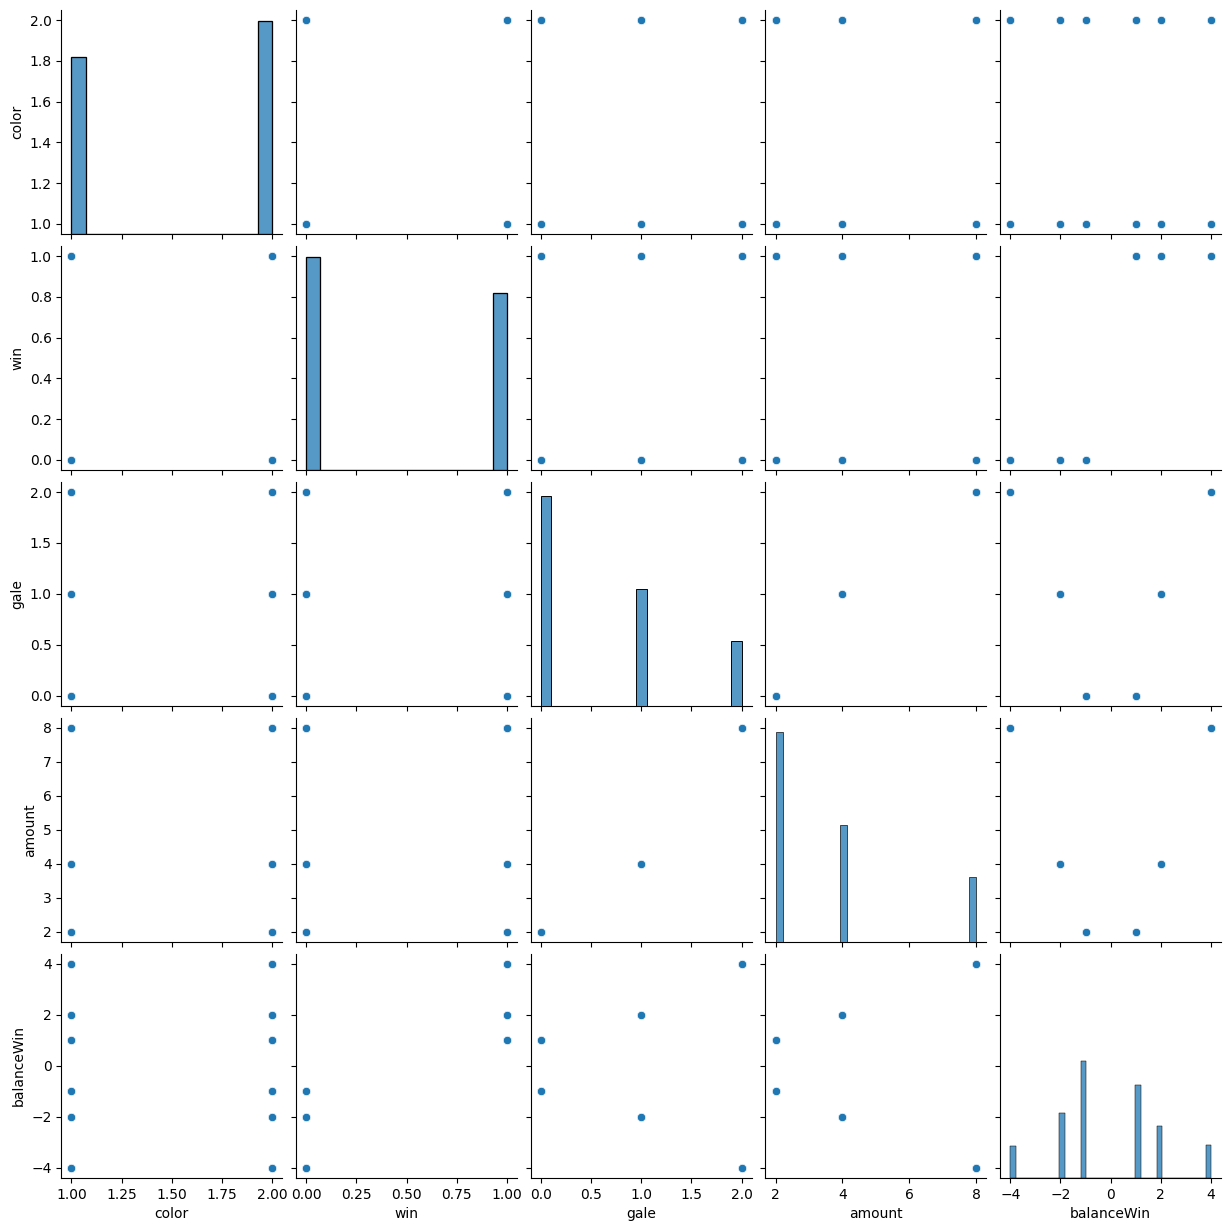

In [23]:
seaborn.pairplot(df)